# **Smker Classification Project**
This notebook demonstrates a classification task using different machine learning models including KNN, Decision Tree, Naive Bayes, and Neural Networks.

### **1. Import Libraries**
We start by importing necessary libraries for data manipulation, visualization, and machine learning models.
### Install required libraries
```python
!pip install -r requirements.txt

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
import graphviz
from sklearn.metrics import accuracy_score, roc_auc_score, auc, roc_curve, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Set default Seaborn style
sns.set_style('darkgrid')

### **2. Load and Preprocess Data**
We load the dataset, encode categorical variables, and scale the features.


In [2]:
class DataPreprocessing:
    def __init__(self, data):
        self.data = data

    # Step 1: Encode categorical variables
    def preformDataPreprocessingStep1(self):
        self.__encodeCatagoricalVariables(self.data)
        return self.data
    
    # Step 2: Feature Scaling
    def preformDataPreprocessingStep2(self):
        self.__featureScalling(self.data)
        return self.data
    
    def __encodeCatagoricalVariables(self, data):
        label_Encoder = LabelEncoder()
        data['Gender'] = label_Encoder.fit_transform(data['Gender'])
        data['Smoker'] = label_Encoder.fit_transform(data['Smoker'])
        data['Region'] = label_Encoder.fit_transform(data['Region'])
        self.data = data
    
    def __featureScalling(self, data):
        scaler = StandardScaler()
        scaler.fit(data[['Age', 'BMI', 'No. Childred', 'Insurance Charges']])
        data[['Age', 'BMI', 'No. Childred', 'Insurance Charges']] = scaler.transform(data[['Age', 'BMI', 'No. Childred', 'Insurance Charges']])
        self.data = data

# Load dataset
data = pd.read_csv("data/Data_project2.csv")
dataPreprocessing = DataPreprocessing(data)

# Preprocess data
data = dataPreprocessing.preformDataPreprocessingStep1()
data = dataPreprocessing.preformDataPreprocessingStep2()

# Show the first few rows of processed data
data.head()


,Age,Gender,BMI,Region,No. Childred,Insurance Charges,Smoker
0,-0.978409,1,-0.023831,0,-1.462089,-0.957756,0
1,0.173916,0,0.071748,0,-1.462089,-0.614209,0
2,-0.857411,1,-0.728198,0,0.873907,-0.673401,0
3,0.939679,0,0.046320,1,0.873907,-0.132015,0
4,0.978629,1,-0.695813,1,0.289908,1.204723,1


### **3. Data Visualization**
Visualize the distribution of the target variable and other features.


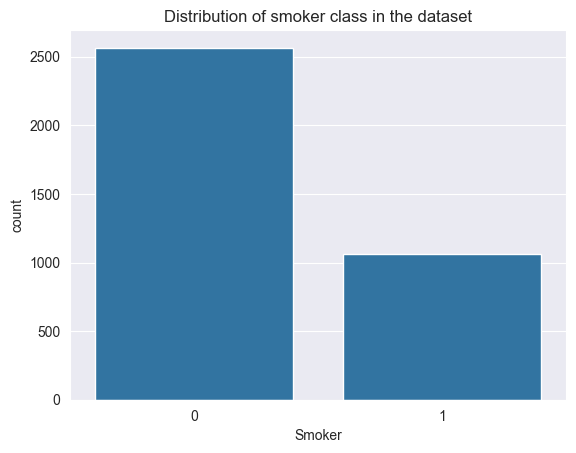

In [3]:
# Distribution of smoker class
sns.countplot(x="Smoker", data=data)
plt.title("Distribution of smoker class in the dataset")
plt.show()

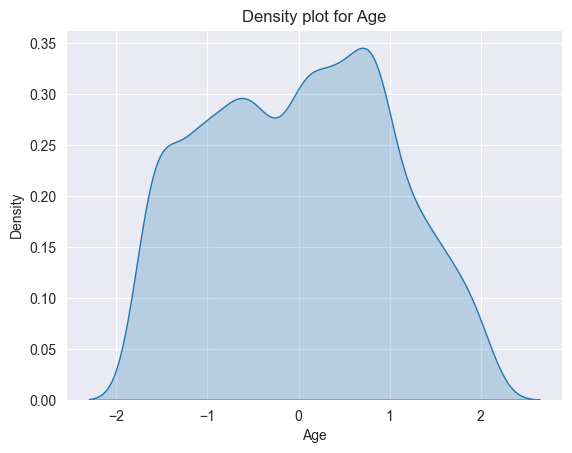

In [4]:
# Density plot for age
sns.kdeplot(data["Age"], fill=True)
plt.title("Density plot for Age")
plt.show()

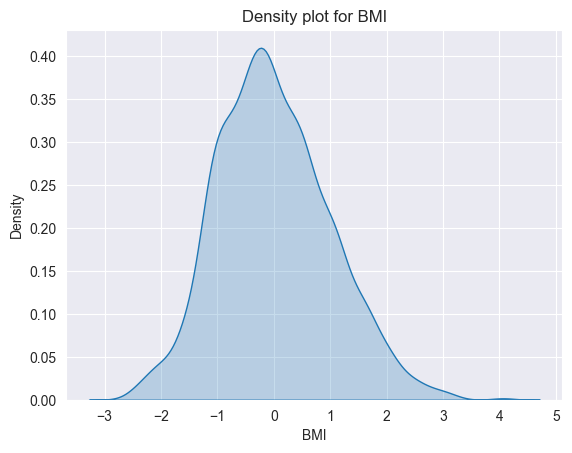

In [5]:
# Density plot for BMI
sns.kdeplot(data['BMI'], fill=True)
plt.title("Density plot for BMI")
plt.show()

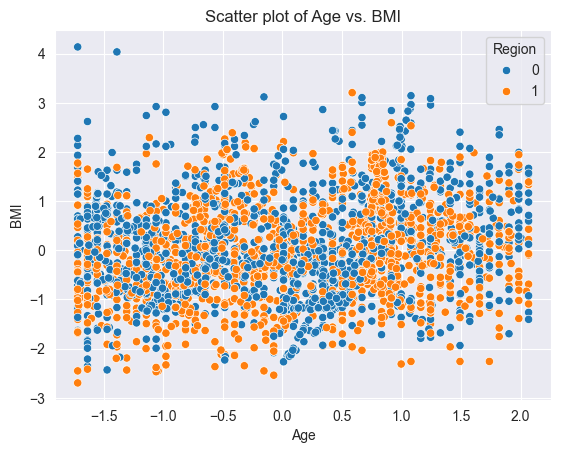

In [6]:
# Scatter plot of Age vs. BMI based on Region
sns.scatterplot(x="Age", y="BMI", hue="Region", data=data)
plt.title("Scatter plot of Age vs. BMI")
plt.show()

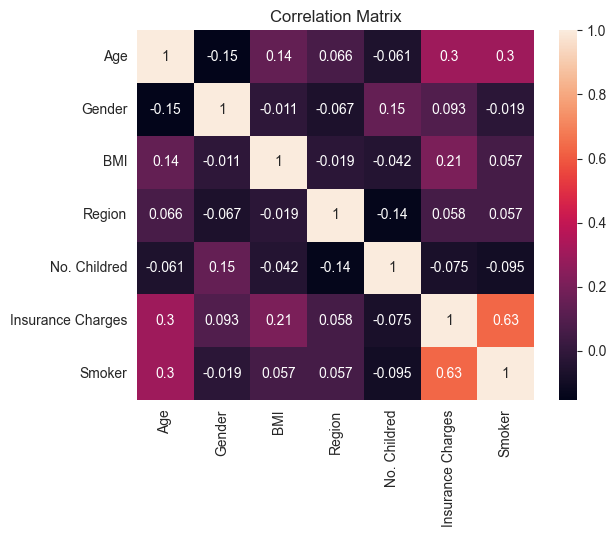

In [7]:
# Correlation matrix
# values close to 1 or -1 indicate strong correlation between the variables
corrMat = data.corr()
sns.heatmap(corrMat, annot=True)
plt.title("Correlation Matrix")
plt.show()

### **4. Train-Test Split**
We split the dataset into training and test sets.

In [8]:
X = data.drop('Smoker', axis=1)
y = data['Smoker']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, shuffle=True)
print("Training data shape: ", X_train.shape)
print("Testing data shape: ", X_test.shape)


Training data shape:  (2904, 6)
Testing data shape:  (726, 6)


### **5. Model Training and Evaluation**
We train several models, including KNN, Decision Tree, Naive Bayes, and Neural Networks, and evaluate their performance.


In [9]:
class ClassificationTasks:
    def __init__(self, x_train, x_test, y_train, y_test):
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test

    def k_nearest_neighbors(self, num_neighbors=58):
        knn = KNeighborsClassifier(n_neighbors=num_neighbors)
        knn.fit(self.x_train, self.y_train)
        return knn

    def decision_tree(self):
        clfTree = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=40, random_state=10)
        clfTree.fit(self.x_train, self.y_train)
        return clfTree

    def naive_bayes(self):
        naiveBayesModel = GaussianNB()
        naiveBayesModel.fit(self.x_train, self.y_train)
        return naiveBayesModel

    def neural_network(self):
        modelANN = MLPClassifier(hidden_layer_sizes=1, max_iter=500, activation='logistic', random_state=42, learning_rate_init=0.05)
        modelANN.fit(self.x_train, self.y_train)
        return modelANN

# Initialize the models
classificationTasks = ClassificationTasks(X_train, X_test, y_train, y_test)
models = {
    'KNN': classificationTasks.k_nearest_neighbors(),
    'Decision Tree': classificationTasks.decision_tree(),
    'Naive Bayes': classificationTasks.naive_bayes(),
    'Neural Network': classificationTasks.neural_network()
}

# Evaluate models
results = {'Model': [], 'Accuracy': [], 'ROC/AUC': [], 'Precision': [], 'Recall': [], 'F1-score': []}

for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred)
    
    # Append results
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['ROC/AUC'].append(roc_auc)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-score'].append(f1score)

# Display results in a DataFrame
results_df = pd.DataFrame(results)
results_df


,Model,Accuracy,ROC/AUC,Precision,Recall,F1-score
0,KNN,0.862259,0.796402,0.806250,0.651515,0.720670
1,Decision Tree,0.913223,0.915088,0.794760,0.919192,0.852459
2,Naive Bayes,0.805785,0.711806,0.699301,0.505051,0.586510
3,Neural Network,0.881543,0.912247,0.702899,0.979798,0.818565


### **6. Model Evaluation - Confusion Matrix and ROC Curve**
We plot the confusion matrix and ROC curve for each model.


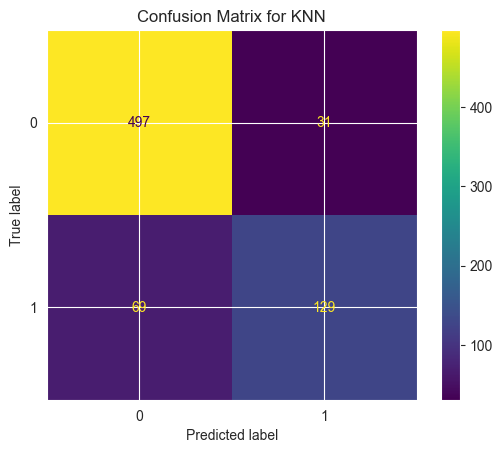

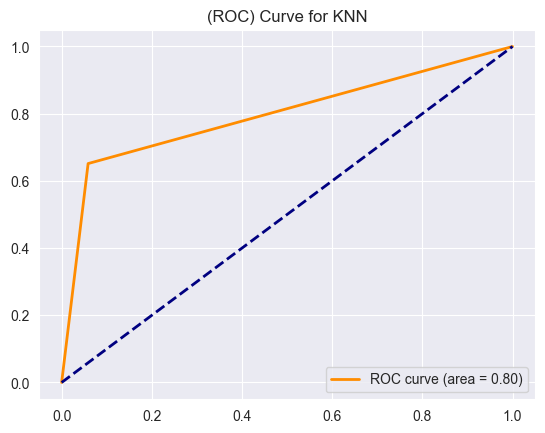

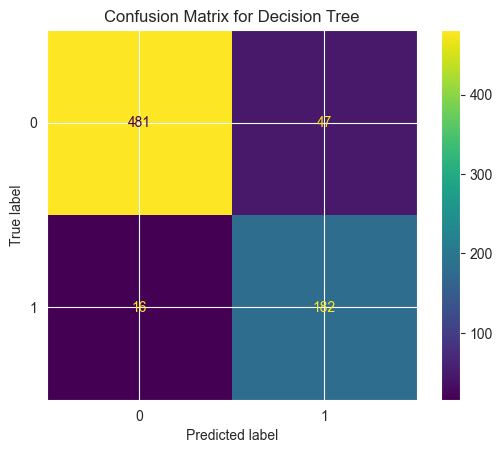

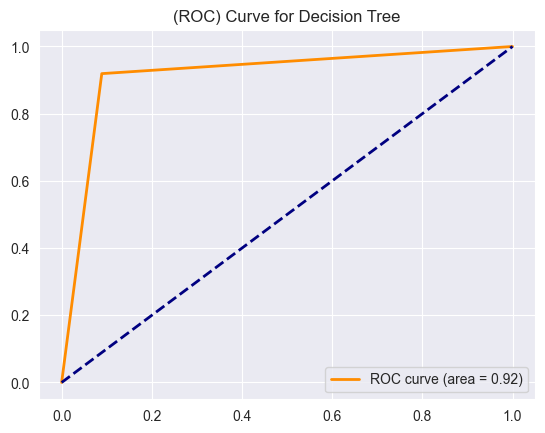

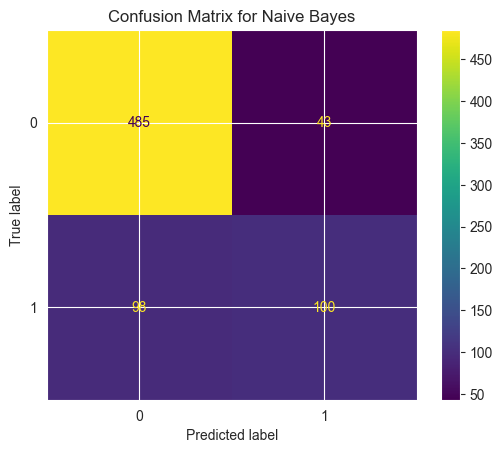

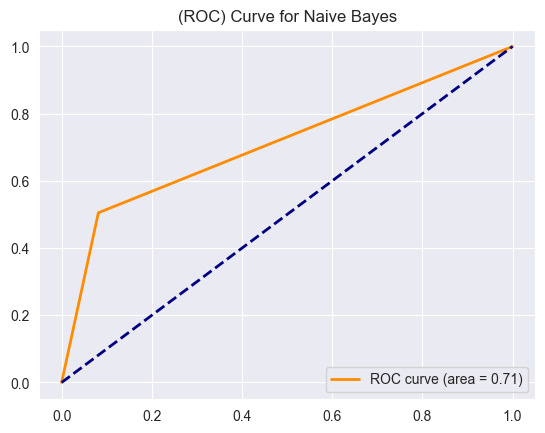

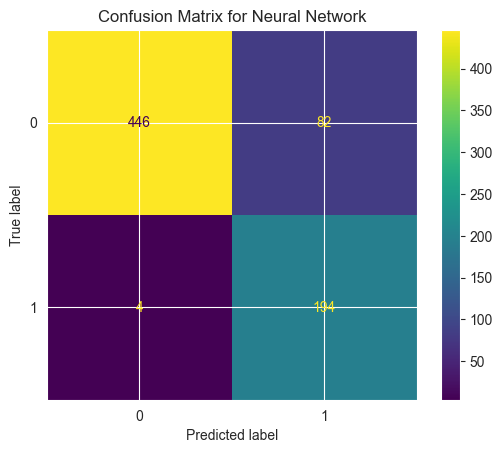

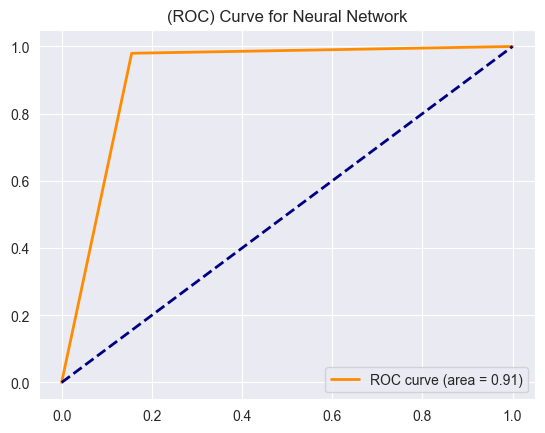

In [10]:
def showConfusionMatrix(y_test, y_pred, modelName):
    cm = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
    cm_display.plot().ax_.set_title(f'Confusion Matrix for {modelName}')
    plt.show()

def showRoCcurve(fpr, tpr, modelName):
    roc_auc_curve = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_curve))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.title(f'(ROC) Curve for {modelName}')
    plt.legend(loc="lower right")
    plt.show()

for name, model in models.items():
    y_pred = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    showConfusionMatrix(y_test, y_pred, name)
    showRoCcurve(fpr, tpr, name)


### **7. Model Training and Evaluation Summary**

In this section, we trained four different classification models: K-Nearest Neighbors (KNN), Decision Tree, Naive Bayes, and Neural Network. Each model was evaluated using several metrics, including Accuracy, ROC/AUC, Precision, Recall, and F1-score. Here's a brief explanation of these metrics:

- **Accuracy**: The percentage of correctly predicted instances out of the total instances.
- **ROC/AUC**: This measures  ability of the model to distinguish between classes; a higher value indicates better performance.
- **Precision**: The proportion of true positive predictions to the total positive predictions made by the model.
- **Recall**: The proportion of true positive predictions to the actual positive instances in the dataset.
- **F1-score**: The harmonic mean of Precision and Recall, providing a balance between the two.

#### **Model Performance:**

| Model              | Accuracy | ROC/AUC | Precision | Recall | F1-score |
|--------------------|----------|---------|-----------|--------|----------|
| KNN                | 0.8623   | 0.7964  | 0.8063    | 0.6515 | 0.7207   |
| Decision Tree      | 0.9132   | 0.9151  | 0.7948    | 0.9192 | 0.8525   |
| Naive Bayes        | 0.8058   | 0.7118  | 0.6993    | 0.5051 | 0.5865   |
| Neural Network     | 0.8815   | 0.9122  | 0.7029    | 0.9798 | 0.8186   |

From the results, we can see that the Decision Tree model performed the best overall, achieving the highest accuracy (91.32%) and ROC/AUC score (0.9151). It also excelled in Recall, indicating that it successfully identified most of the positive instances. The KNN and Neural Network models also performed well, while the Naive Bayes model had the lowest performance across most metrics.
